In [122]:
from keras.datasets import mnist

In [123]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [124]:
x_train.shape

(60000, 28, 28)

In [125]:
x_test.shape

(10000, 28, 28)

In [126]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

In [127]:
x_train.shape

(60000, 28, 28, 1)

In [128]:
x_train[1].max()

255

In [129]:
x_train = x_train.astype("float32")
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train[1,6,5]

array([0.], dtype=float32)

In [130]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [131]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [132]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [133]:
x_train.shape[1:]

(28, 28, 1)

In [134]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation

In [135]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape= x_train.shape[1:]))
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3), activation="relu"))

model.add(Flatten())
model.add(Dense(256, activation="relu")) #Burada bir aktivasyon gözükmüyor 
model.add(Dropout(0.25))
model.add(Dense(128, activation="relu")) ## Burada da
model.add(Dropout(0.3))

model.add(Dense(y_train.shape[1], activation="softmax")) #Burada da

model.compile(loss = 'categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [136]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 activation_10 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 activation_11 (Activation)  (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 10, 10, 128)       73856     
                                                      

In [137]:
import time

batch_size = [32,64,128,256,512,1024]
epochs=10
history= list()
times = list()

In [138]:
for size in batch_size:
  start = time.time()
  print("For batch size:", size)
  history.append(model.fit(x_train,y_train, batch_size = size, epochs = epochs, verbose=-1, validation_data=(x_test,y_test)))
  stop= time.time()
  times.append(stop-start)

For batch size: 32
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
For batch size: 64
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
For batch size: 128
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
For batch size: 256
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
For batch size: 512
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
For batch size: 1024
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


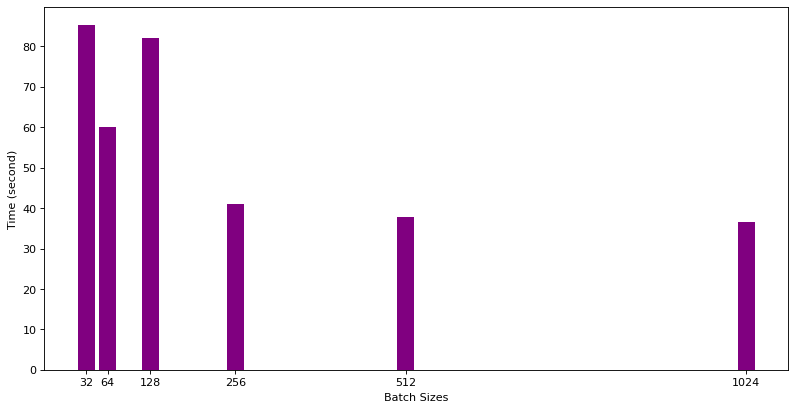

In [139]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(batch_size,times, width = 25, color="purple")
plt.xlabel("Batch Sizes")
plt.ylabel("Time (second)")
plt.xticks(batch_size)
plt.show()

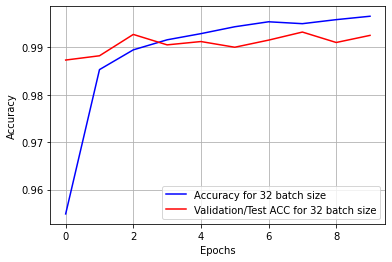

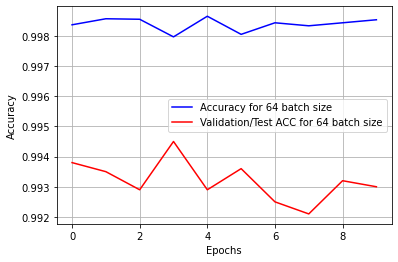

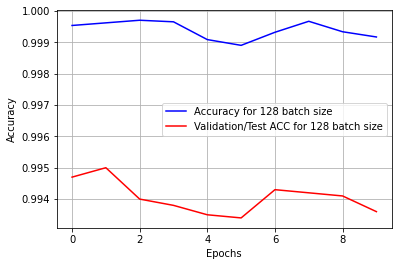

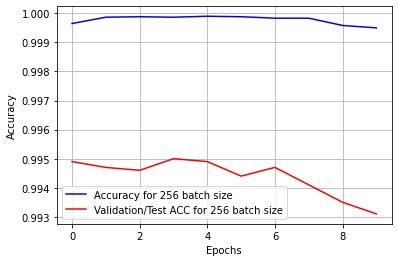

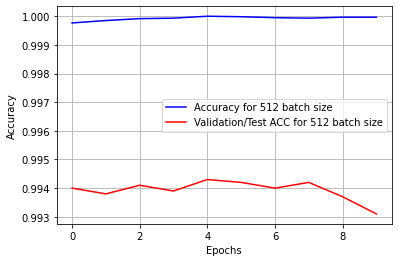

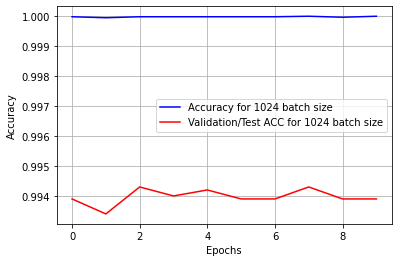

In [153]:
import matplotlib.pyplot as plt

for i in range(len(batch_size)):
  history_dict = history[i].history
  accuracy = history_dict["accuracy"]
  val_accuracy = history_dict["val_accuracy"]

  plt.plot(range(len(history_dict["accuracy"])), accuracy, label=f"Accuracy for {batch_size[i]} batch size", color="b")
  plt.plot(range(len(history_dict["accuracy"])), val_accuracy, label=f"Validation/Test ACC for {batch_size[i]} batch size", color="r")

  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.grid(True)
  plt.legend()
  plt.show()

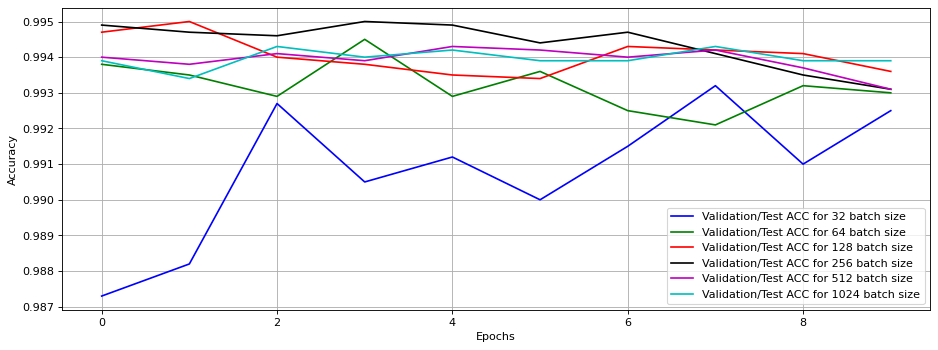

In [152]:
plt.figure(figsize=(14, 5), dpi=80)
for color,i in zip(["b","g","r","k", "m", "c"],range(len(batch_size))):
  history_dict = history[i].history
  accuracy = history_dict["accuracy"]
  val_accuracy = history_dict["val_accuracy"]

  plt.plot(range(len(history_dict["accuracy"])), val_accuracy, label=f"Validation/Test ACC for {batch_size[i]} batch size", color=color)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

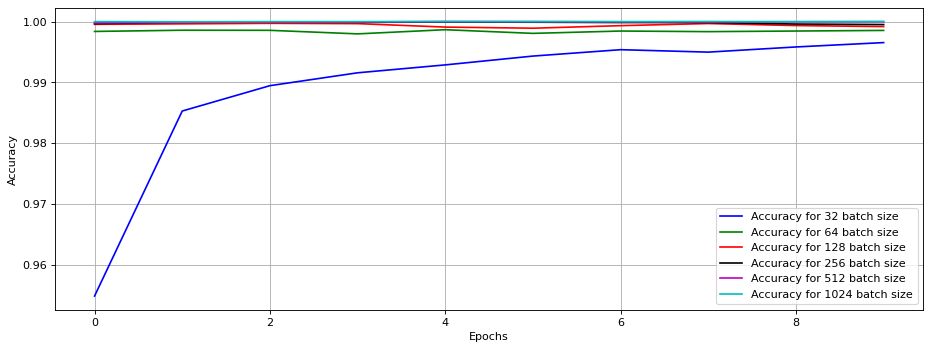

In [151]:
plt.figure(figsize=(14, 5), dpi=80)
for color,i in zip(["b","g","r","k", "m", "c"],range(len(batch_size))):
  history_dict = history[i].history
  accuracy = history_dict["accuracy"]
  val_accuracy = history_dict["val_accuracy"]

  plt.plot(range(len(history_dict["accuracy"])), accuracy, label=f"Accuracy for {batch_size[i]} batch size", color=color)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()